# Clustering

The goal of this notebook is to give an answer to the following questions:
1. Does the distribution contain different sub-populations? How many?
2. What's the threshold between the classes?

In [1]:
import numpy as np

In [2]:
import sys
sys.path.append(r'C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Notebooks\AstroStatistics\ML\GammaRayBursts\Utilities')
import utils
import plot_settings

In [3]:
url = 'https://user-web.icecube.wisc.edu/~grbweb_public/Summary_table.txt'
raw, names = utils.read_data(url)

C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Notebooks\AstroStatistics\ML\GammaRayBursts\Utilities\utils.py:21: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  raw = np.loadtxt("Summary_table.txt", dtype='str',unpack='True')


In [4]:
names

array(['GRB_name', 'GRB_name_Fermi', 'T0', 'ra', 'decl', 'pos_error',
       'T90', 'T90_error', 'T90_start', 'fluence', 'fluence_error',
       'redshift', "'T100'", 'GBM_located', 'mjd_(T0)'], dtype='<U14')

In [5]:
ra = np.array(raw[3]).astype(float)
de = np.array(raw[4]).astype(float)

In [6]:
T90, T90_err, fluence, fluence_err, RS = zip(*[(float(a), float(b), float(c), float(d), float(h)) for a, b, c, d, h in zip(raw[6], raw[7], raw[9], raw[10], raw[11]) 
                                           if a != '-999' and b != '-999' and float(b)!=0 
                                           and c != '-999' and float(c) != 0
                                           and d != '-999' and float(d) != 0
                                           and h != '-999' and float(h) != 0])

In [7]:
T90         = np.array(T90)
T90_err     = np.array(T90_err)
fluence     = np.array(fluence)
fluence_err = np.array(fluence_err)
RS          = np.array(RS)


In [8]:
import matplotlib.pyplot as plt

## Clustering GMM (No errors)

### Let's cluster on T90 and fluence

In [9]:
T90, T90_err, fluence, fluence_err = zip(*[(float(a), float(b), float(c), float(d)) for a, b, c, d in zip(raw[6], raw[7], raw[9], raw[10]) 
                                           if a != '-999' and b != '-999' and float(b)!=0 
                                           and c != '-999' and float(c) != 0
                                           and d != '-999' and float(d) != 0
                                           ])

In [10]:
DD = np.vstack([np.log10(T90), np.log10(fluence)]).T

In [13]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test = train_test_split(DD, test_size=0.2, random_state=42)

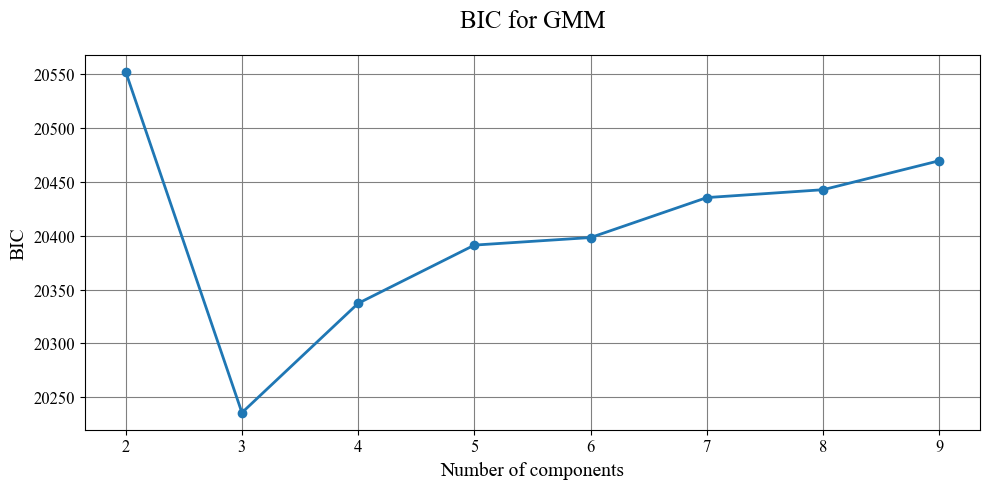

In [17]:
n_clusters, score = utils.Gauss_peaks(X_train, 2, 10, True)

In [22]:
_ , model = utils.GM_fit(X_train, n_clusters, False)

In [23]:
labels = model.predict(X_test)

In [24]:
centroids = model.means_
weights = model.weights_
ll = model.score_samples(X_test)

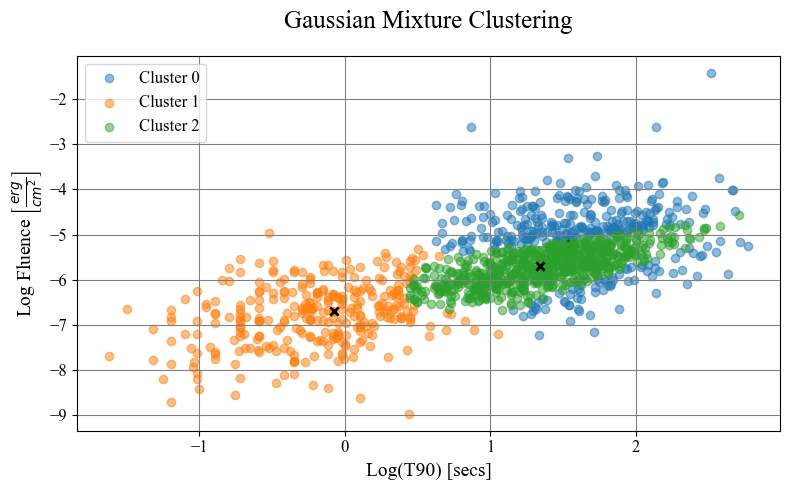

In [28]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()  

for i,c in enumerate(centroids):
    ax.scatter(X_test.T[0][labels==i],X_test.T[1][labels==i], marker='o', alpha=0.5, label=f'Cluster {i}')
    ax.scatter(c[0], c[1], marker='x', color='black')
    
ax.set_title('Gaussian Mixture Clustering')
ax.set_xlabel('Log(T90) [secs]')
ax.set_ylabel(r'Log Fluence $\left[\frac{erg}{cm^2}\right]$')
ax.legend()

Let's try clustering on Redshift and fluence

In [29]:
names

array(['GRB_name', 'GRB_name_Fermi', 'T0', 'ra', 'decl', 'pos_error',
       'T90', 'T90_error', 'T90_start', 'fluence', 'fluence_error',
       'redshift', "'T100'", 'GBM_located', 'mjd_(T0)'], dtype='<U14')

In [30]:
fluence, RS = zip(*[(float(a), float(b)) for a, b, in zip(raw[9], raw[11]) 
                                           if a != '-999' and b != '-999' 
                                           and float(b)!=0 and float(a)!=0
                                           ])

In [31]:
R = np.vstack([np.log10(fluence), RS]).T

In [32]:
R_train, R_test = train_test_split(R, test_size=0.2, random_state=42)

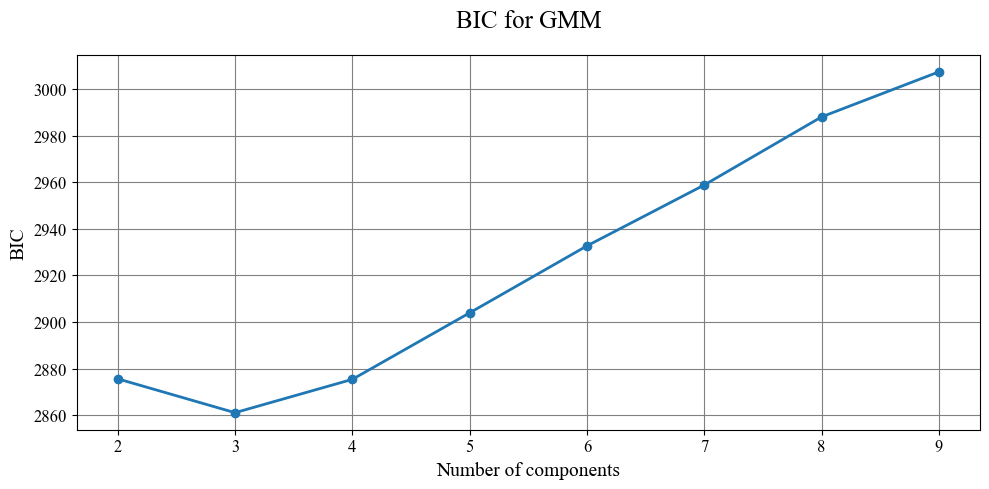

In [33]:
n_clusters, score = utils.Gauss_peaks(R_train, 2, 10, True)

In [35]:
_, model = utils.GM_fit(R_train, n_clusters, False)

In [36]:
labels = model.predict(R_test)

In [37]:
centroids = model.means_
weights = model.weights_
ll = model.score_samples(R_test)

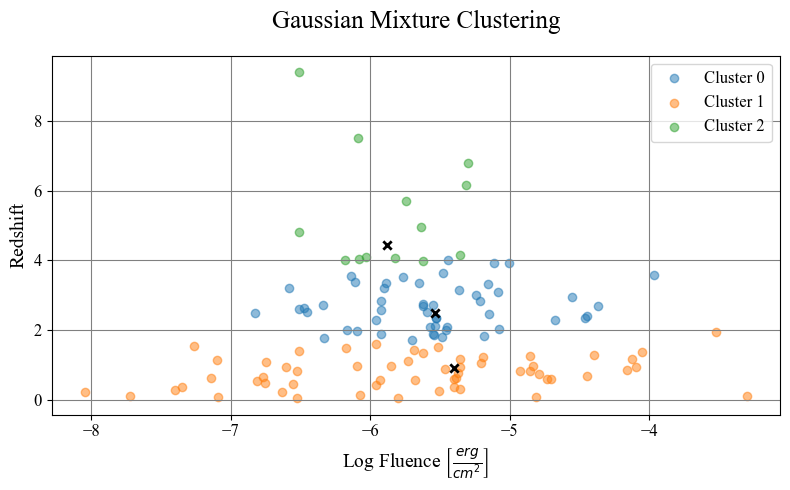

In [38]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()

#ax.scatter(np.log10(T90), np.log10(fluence), marker='o', color='gray', label='Raw Data', alpha=0.5)

for i,c in enumerate(centroids):
    ax.scatter(R_test.T[0][labels==i],R_test.T[1][labels==i], marker='o', alpha=0.5, label=f'Cluster {i}')
    ax.scatter(c[0], c[1], marker='x', color='black')
    

ax.set_title('Gaussian Mixture Clustering')
ax.set_xlabel(r'Log Fluence $\left[\frac{erg}{cm^2}\right]$')
ax.set_ylabel('Redshift')
ax.legend()

 ## Cluster KMeans (No errors)

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [44]:
KM = KMeans(n_clusters=3, random_state=0, n_init='auto').fit(scaler.fit_transform(X_train))

In [45]:
labels = KM.predict(scaler.fit_transform(X_test))

In [46]:
print('Score' , KM.score(X_test))

Score -36367.799104992315


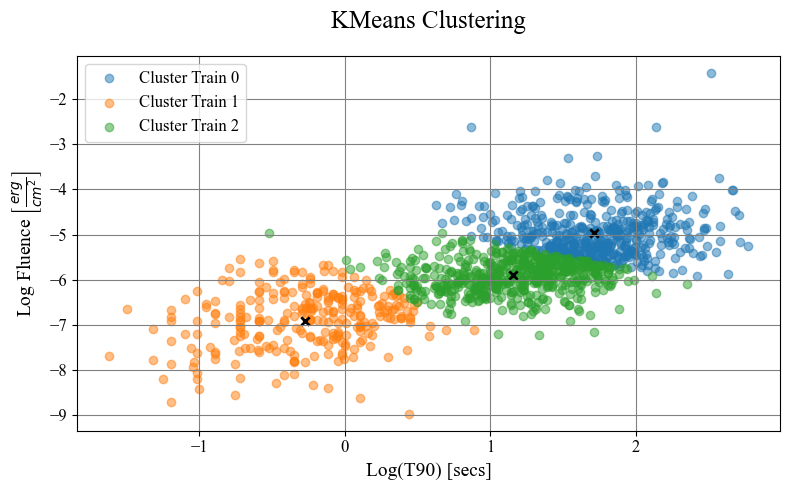

In [48]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()

#ax.scatter(np.log10(T90), np.log10(fluence), marker='o', color='gray', label='Raw Data', alpha=0.5)

for i,c in enumerate(scaler.inverse_transform(KM.cluster_centers_)):
    ax.scatter(X_test.T[0][labels==i],X_test.T[1][labels==i], marker='o', alpha=0.5, label=f'Cluster Train {i}')
    ax.scatter(c[0], c[1], marker='x', color='black')

ax.set_title('KMeans Clustering')
ax.set_xlabel('Log(T90) [secs]')
ax.set_ylabel(r'Log Fluence $\left[\frac{erg}{cm^2}\right]$')
ax.legend()

## Mean Shift (No Errors)

In [49]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [53]:
bw = estimate_bandwidth(X_train, quantile=0.2)

In [54]:
MS = MeanShift(bandwidth=bw)

In [55]:
MS.fit(X_train)

MeanShift(bandwidth=np.float64(0.7267754101089229))

In [56]:
labels = MS.predict(X_test)

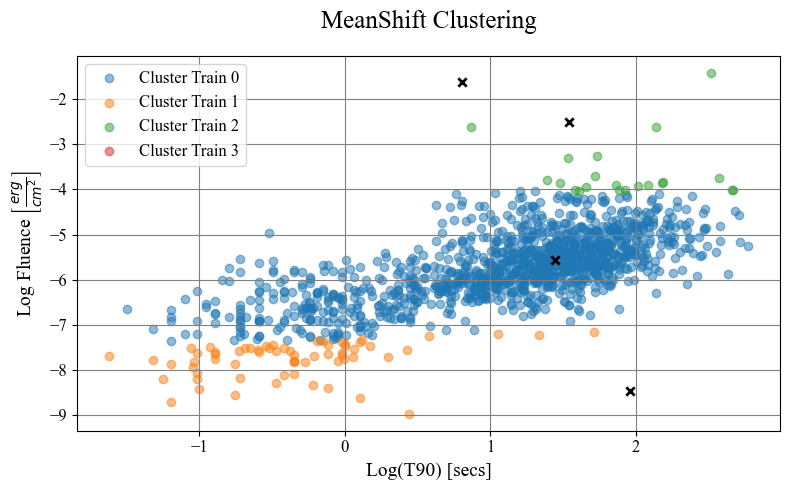

In [57]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()

for i,c in enumerate(MS.cluster_centers_):
    ax.scatter(X_test.T[0][labels==i],X_test.T[1][labels==i], marker='o', alpha=0.5, label=f'Cluster Train {i}')
    ax.scatter(c[0], c[1], marker='x', color='black')

ax.set_title('MeanShift Clustering')
ax.set_xlabel('Log(T90) [secs]')
ax.set_ylabel(r'Log Fluence $\left[\frac{erg}{cm^2}\right]$')
ax.legend()